# Predicting heart disease using machine learning

We're going to take the following approach:

    Problem definition
    Data
    Evaluation
    Features
    Modelling
    Experimentation


## 1. Problem Definition
In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create data dictionary**


    1. age - age in years
    2. sex - (1 = male; 0 = female)
    3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    5. chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    7. restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    8. thalach - maximum heart rate achieved
    9. exang - exercise induced angina (1 = yes; 0 = no)
    10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    12. ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


### Preparing the tools

In [468]:
import sklearn
sklearn.__version__

'1.5.1'

`plot_roc_curve` is for sklearn version below 1.2

Above 1.2+ we use `RocCurveDisplay` 

In [469]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay

#added for hyperparmeter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# for roccurevedisplay
from sklearn import metrics

#increase model i have used catboost
from catboost import CatBoostClassifier

## Load Data

In [588]:
df = pd.read_csv("../data/heart-disease.csv")
df.head(),df.shape

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 (303, 14))


### Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

    What question(s) are you trying to solve?
    What kind of data do we have and how do we treat different types?
    What's missing from the data and how do you deal with it?
    Where are the outliers and why should you care about them?
    How can you add, change or remove features to get more out of your data?



In [471]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [472]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

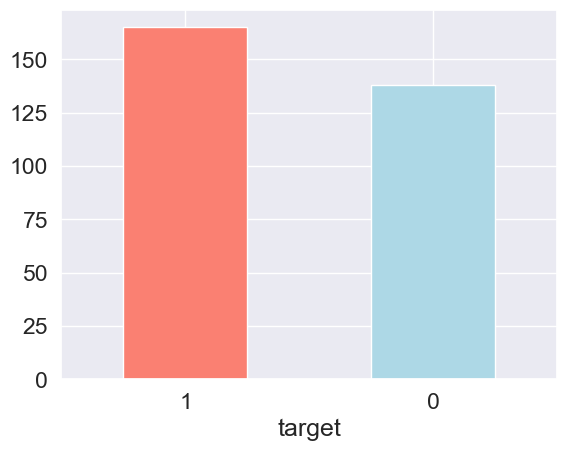

In [473]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])
plt.xticks(rotation=0)
plt.show();

## Heart Disease Frequency according to Sex

In [474]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [475]:
#compare target with sex
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


In [476]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

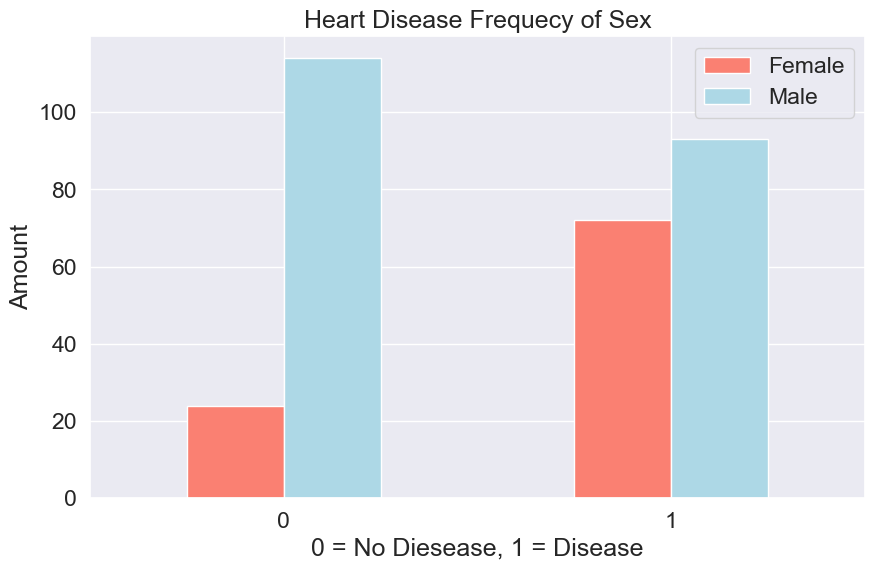

In [477]:
#we use plots to visualize target and sex columns
pd.crosstab(df['target'],df['sex']).plot(kind='bar',
                                        figsize=(10,6),
                                        color=["salmon", "lightblue"])
# 0=Female & 1= Male --> given in data dictionary
plt.title("Heart Disease Frequecy of Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show();

## Age vs. Max Heart Rate for Heart Disease

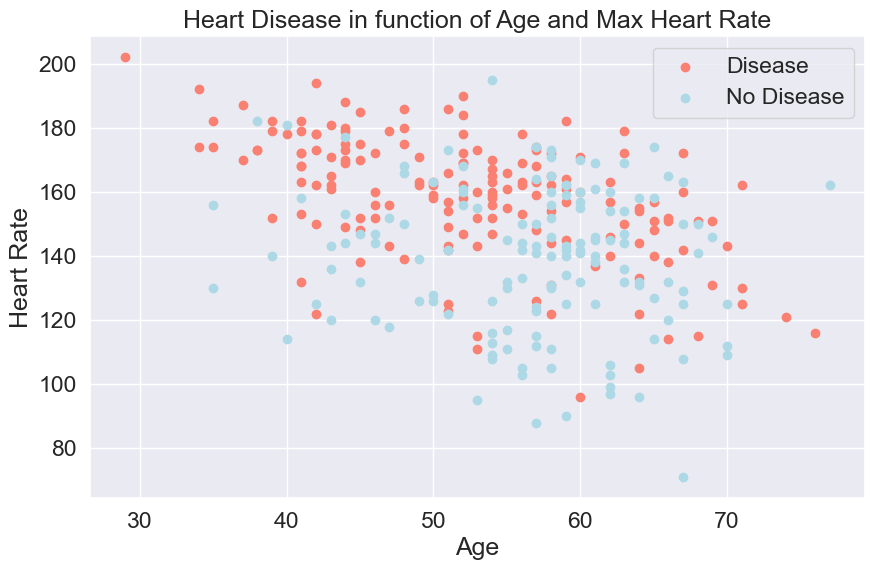

In [478]:
#create another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

# herewe plot 1st as positive so "disease" and next is negative so legend is "no Diesease"
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show();

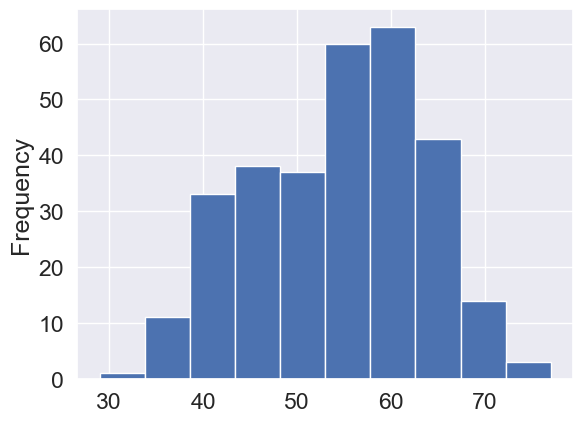

In [479]:
df["age"].plot.hist()
plt.show();

In [480]:
# # Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


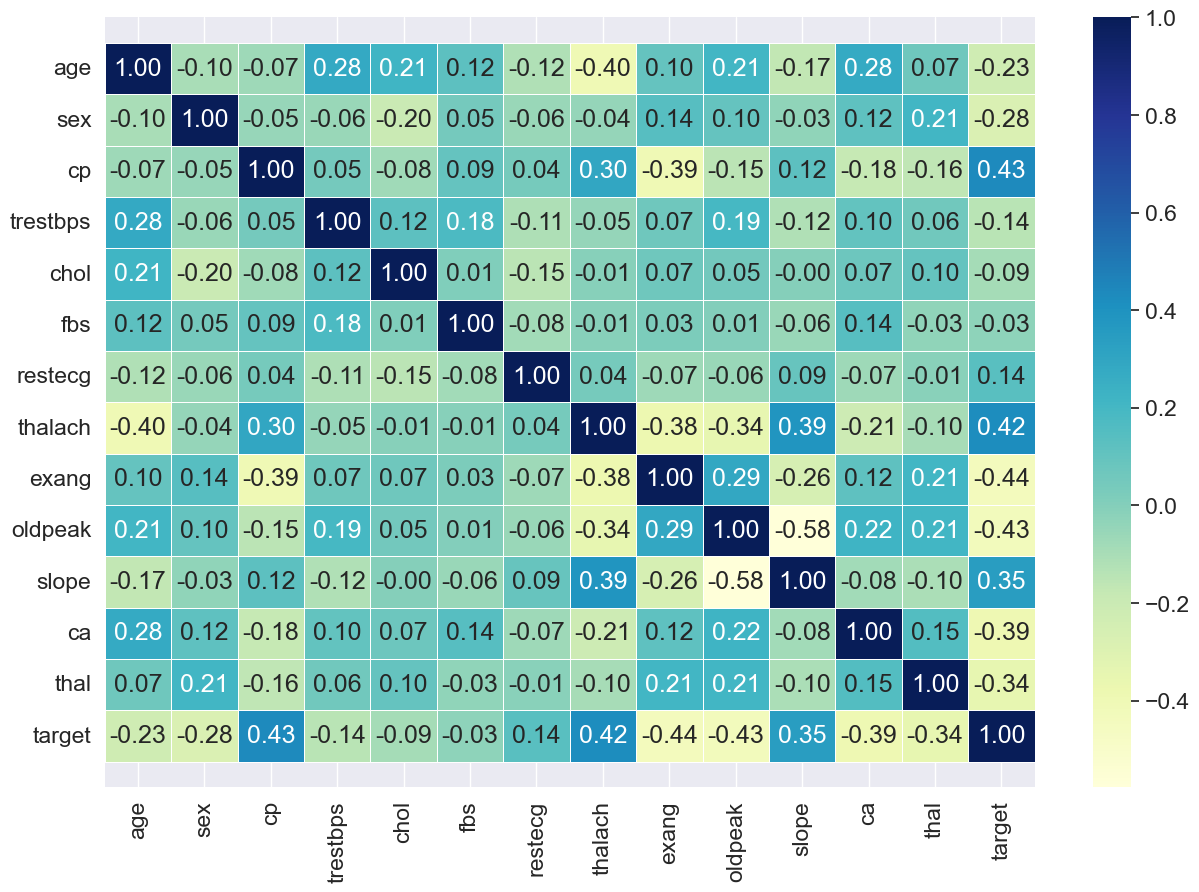

In [481]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

## 5. Modelling

In [482]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [483]:
#split data
X= df.drop(columns="target", axis=1)
y = df['target']

In [484]:
X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [485]:

np.random.seed(42)
# split into train and test
X_train,X_test, y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)


In [486]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [487]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

We're going to try 3 different machine learning models:

    Logistic Regression
    K-Nearest Neighbours Classifier
    Random Forest Classifier


In [488]:
# put models in dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest Classifier" : RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models
    model: a dictionary of different scikit-learning machine models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """
    # set random seed
    np.random.seed(42)
    #make dictionary to keed model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #Fit the model
        model.fit(X_train,y_train)
        #evaluate model
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [489]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

D:\machine_learning_practice\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

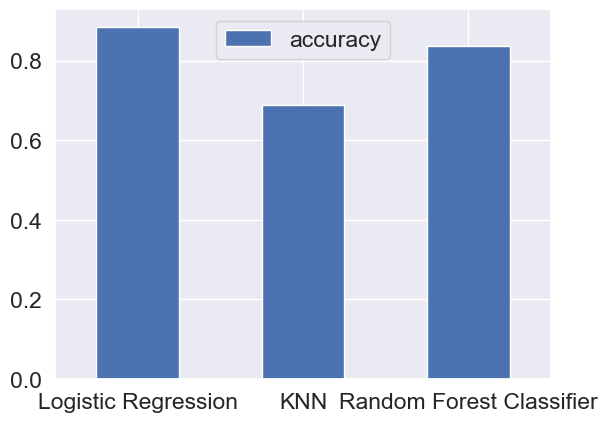

In [490]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot(kind='bar')
plt.xticks(rotation=0)
plt.show();

Let's look at the following:

    Hypyterparameter tuning
    Feature importance
    Confusion matrix
    Cross-validation
    Precision
    Recall
    F1 score
    Classification report
    ROC curve
    Area under the curve (AUC)


## Hypyterparameter tuning (By hand)

In [491]:
# let's tune Knn

train_scores = []
test_scores = []

#create a list of different values of n_neighbors
neighbors = range(1,21)

#set up KNN model
knn = KNeighborsClassifier()

#loop for different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(X_train,y_train)
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    # Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))


In [492]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [493]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

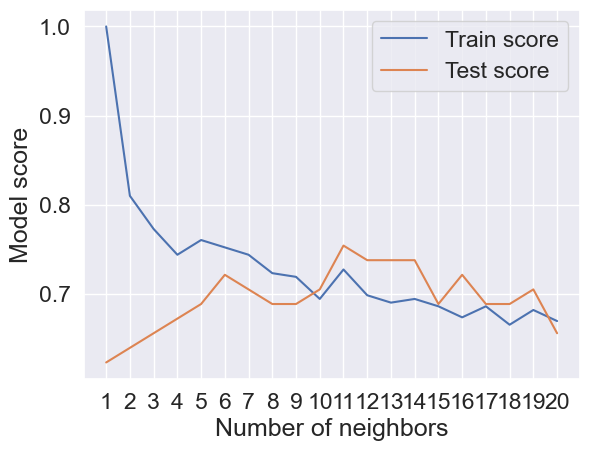

Maximum KNN score on the test data: 75.41%


In [494]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show();
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

In [495]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

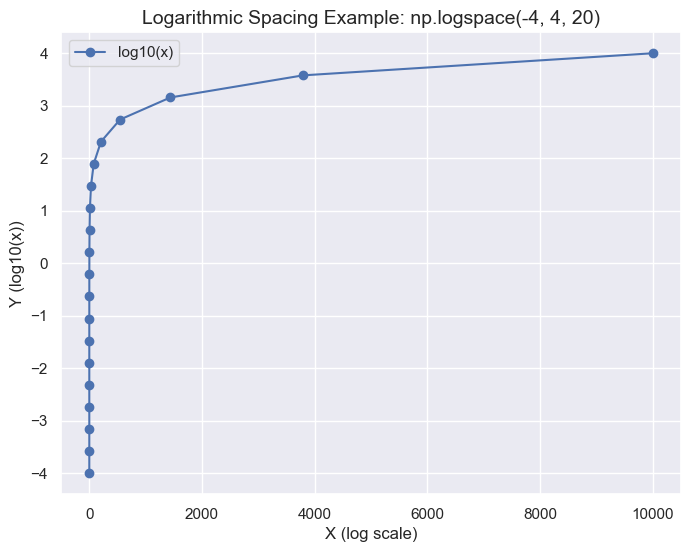

In [496]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate values using np.logspace from 10^-4 to 10^4, with 20 points
x = np.logspace(-4, 4, 20)

# Compute some function of x for the y-values (for example, y = log10(x))
y = np.log10(x)

# Set the style for the plot using seaborn
sns.set(style="darkgrid")

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='log10(x)')

# Set plot labels and title
plt.xlabel('X (log scale)', fontsize=12)
plt.ylabel('Y (log10(x))', fontsize=12)
plt.title('Logarithmic Spacing Example: np.logspace(-4, 4, 20)', fontsize=14)

# Display a legend
plt.legend()

# Show the plot
plt.show()


## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

    LogisticRegression()
    RandomForestClassifier()

... using RandomizedSearchCV

In [497]:
#create hyperparameter tuning for logistic regress
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

#create hyperparameter tuning for randomforest
rf_grid ={
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [498]:
# Tune logisitic regression

np.random.seed(42)

#setup params in logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose = True)
# fit the model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [499]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [500]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [501]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [502]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [503]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV

In [504]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [505]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [506]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Evaluting our tuned machine learning classifier, beyond accuracy

    ROC curve and AUC score
    Confusion matrix
    Classification report
    Precision
    Recall
    F1-score


In [507]:
y_preds = gs_log_reg.predict(X_test)

from sklearn import metrics
>>> y = np.array([0, 0, 1, 1])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred)
>>> roc_auc = metrics.auc(fpr, tpr)
>>> display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
...                                   estimator_name='example estimator')
>>> display.plot()
<...>
>>> plt.show()

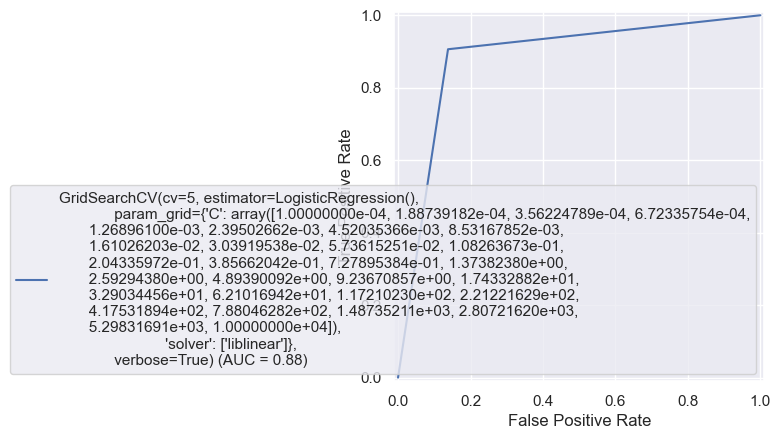

In [508]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_preds)
roc_auc = metrics.auc(fpr,tpr)
estimator_name = gs_log_reg
display = metrics.RocCurveDisplay(fpr=fpr, 
                                  tpr=tpr, 
                                  roc_auc=roc_auc,
                                  estimator_name=estimator_name)

display.plot()
plt.show();

In [509]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


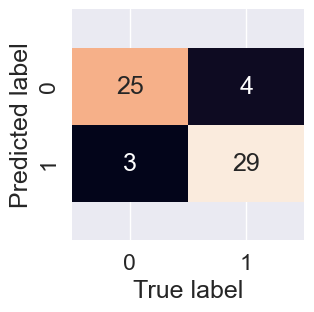

In [510]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)
plt.show();

In [511]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

In [512]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [513]:
#split data
X= df.drop(columns="target", axis=1)
y = df['target']

In [514]:
X,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [515]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [516]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [517]:
#cross_validation precision
cv_prec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [518]:
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [519]:
# cross-validation recall
cv_recall = cross_val_score(clf,
                           X,
                           y,
                           scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [520]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [521]:
#cross validation f1 score
cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [522]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

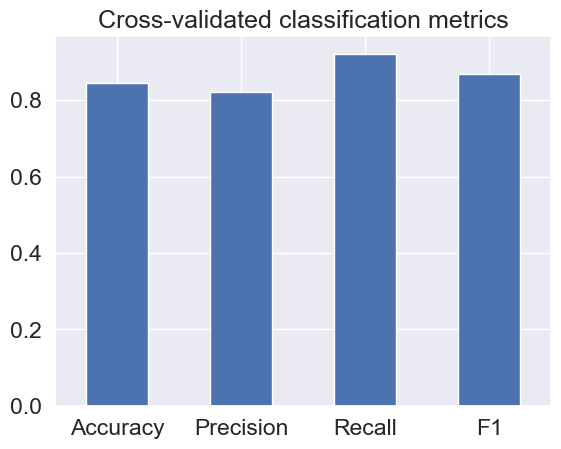

In [523]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)
plt.xticks(rotation=0)
plt.show();

### Feature Importance

In [524]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [525]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [526]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672769574500135,
 'sex': -0.8604461876509621,
 'cp': 0.6606705956911073,
 'trestbps': -0.011569931563712749,
 'chol': -0.0016637424209784567,
 'fbs': 0.04386123481544026,
 'restecg': 0.3127581278171948,
 'thalach': 0.02459361107844528,
 'exang': -0.6041306062020464,
 'oldpeak': -0.5686283181245352,
 'slope': 0.4505162370054866,
 'ca': -0.6360987949056705,
 'thal': -0.6766338344951353}

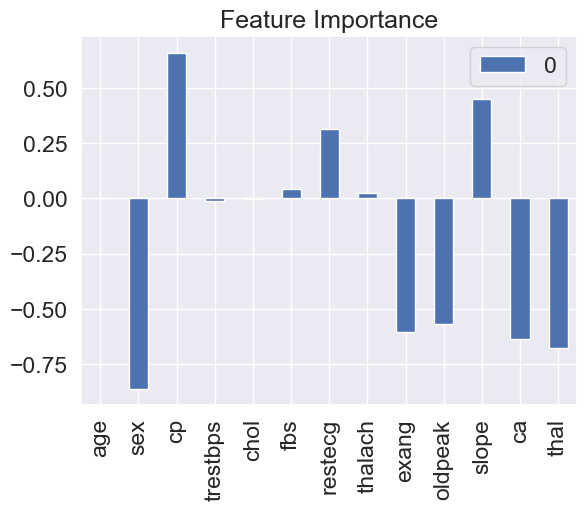

In [527]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind='bar',title="Feature Importance",legend="false")
plt.show();

Based on our feature importance, we remove chol and trestbps

In [528]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [529]:
df_remove = df.drop(columns=["sex"],axis=1)
df_remove.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1


In [530]:
#split data
X= df_remove.drop(columns="target",axis=1)
y=df_remove['target']

In [531]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [532]:
model = RandomForestClassifier()

In [533]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [534]:
model.score(X_test, y_test)

0.8524590163934426

In [535]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [536]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8688524590163934

# CatBoost

In [631]:
df.head(),df.shape

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  ,
 (303, 14))

In [632]:
X= df.drop(columns='target',axis=1)
y=df['target']

In [633]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)

In [634]:
np.random.seed(42)
# Loop through iterations from 1 to 10

cat_model = CatBoostClassifier()  # Disable detailed output
# Train the model
cat_model.fit(X_train, y_train)

# Compute and display the score on test data
score = cat_model.score(X_test, y_test)
score

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 6.51ms	remaining: 6.51s
1:	learn: 0.6846994	total: 8.63ms	remaining: 4.31s
2:	learn: 0.6804470	total: 10.9ms	remaining: 3.61s
3:	learn: 0.6762242	total: 12.5ms	remaining: 3.1s
4:	learn: 0.6716784	total: 14.2ms	remaining: 2.83s
5:	learn: 0.6672808	total: 15.6ms	remaining: 2.59s
6:	learn: 0.6639958	total: 17.3ms	remaining: 2.46s
7:	learn: 0.6601980	total: 19ms	remaining: 2.35s
8:	learn: 0.6563766	total: 20.8ms	remaining: 2.29s
9:	learn: 0.6525103	total: 22.3ms	remaining: 2.2s
10:	learn: 0.6483670	total: 23.5ms	remaining: 2.12s
11:	learn: 0.6448827	total: 24.9ms	remaining: 2.05s
12:	learn: 0.6412767	total: 26.5ms	remaining: 2.01s
13:	learn: 0.6374286	total: 28.2ms	remaining: 1.99s
14:	learn: 0.6335427	total: 30.9ms	remaining: 2.03s
15:	learn: 0.6288052	total: 33.2ms	remaining: 2.04s
16:	learn: 0.6250489	total: 35.3ms	remaining: 2.04s
17:	learn: 0.6209495	total: 38.5ms	remaining: 2.1s
18:	learn: 0.6181899	total: 40.7ms	remaining: 2.1

0.8360655737704918

In [635]:
np.random.seed(42)

# Set bootstrap_type to 'Bernoulli' or 'MVS' instead of the default Bayesian
cat_model = CatBoostClassifier(
    iterations=2,
    learning_rate=0.05,
    depth=5,
    l2_leaf_reg=3,
    bootstrap_type='Bernoulli',
    subsample=0.9,
    colsample_bylevel=1.0,
    loss_function='MultiClass',
    verbose=100,
)

# Fit the model
cat_model.fit(X_train, y_train)

# Test the model on the test data
score = cat_model.score(X_test, y_test)
print(f"Test Score: {score}")


0:	learn: 0.6737031	total: 966us	remaining: 966us
1:	learn: 0.6580162	total: 2.02ms	remaining: 0us
Test Score: 0.9344262295081968


In [639]:
#Cross-validation scores
cv_scores = cross_val_score(cat_model, X, y, cv=5, scoring='f1')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

0:	learn: 0.6774068	total: 957us	remaining: 957us
1:	learn: 0.6594503	total: 2.14ms	remaining: 0us
0:	learn: 0.6777361	total: 926us	remaining: 926us
1:	learn: 0.6618286	total: 1.74ms	remaining: 0us
0:	learn: 0.6757823	total: 1.03ms	remaining: 1.03ms
1:	learn: 0.6559521	total: 1.72ms	remaining: 0us
0:	learn: 0.6752921	total: 484us	remaining: 484us
1:	learn: 0.6588616	total: 1.18ms	remaining: 0us
0:	learn: 0.6740821	total: 457us	remaining: 457us
1:	learn: 0.6586147	total: 1.3ms	remaining: 0us
Cross-validation scores: [0.81690141 0.7826087  0.8        0.85714286 0.80519481]
Mean cross-validation score: 0.8123695532881083


# Gradient Boost

In [553]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [554]:
X= df.drop(columns='target',axis=1)
y=df['target']

In [558]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)

In [559]:
np.random.seed(42)
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_model = GradientBoostingClassifier()

grad_boost_model.fit(X_train,y_train)

grad_boost_model.score(X_test,y_test)

0.7540983606557377